In [38]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
crop_df=pd.read_csv(r'C:\Users\Siddharth\Desktop\BITS\3 2\DM\project\crop_production.csv')


In [39]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [40]:
#create new data frames with required columns
tn_df = crop_df[crop_df['State_Name'] == 'Tamil Nadu'];
tn_df = tn_df[tn_df['Crop'] == 'Rice']
tn_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN
177690,Tamil Nadu,ARIYALUR,2009,Kharif,Rice,25978.0,80462.0
177721,Tamil Nadu,ARIYALUR,2010,Kharif,Rice,25211.0,97869.0
177731,Tamil Nadu,ARIYALUR,2011,Kharif,Rice,24097.0,97257.0
177761,Tamil Nadu,ARIYALUR,2012,Kharif,Rice,17523.0,36392.0


In [41]:
#create list of districts
x = tn_df.District_Name
g=[]

for i in x:
    if i not in g:
        g.append(i)
g

['ARIYALUR',
 'COIMBATORE',
 'CUDDALORE',
 'DHARMAPURI',
 'DINDIGUL',
 'ERODE',
 'KANCHIPURAM',
 'KANNIYAKUMARI',
 'KARUR',
 'KRISHNAGIRI',
 'MADURAI',
 'NAGAPATTINAM',
 'NAMAKKAL',
 'PERAMBALUR',
 'PUDUKKOTTAI',
 'RAMANATHAPURAM',
 'SALEM',
 'SIVAGANGA',
 'THANJAVUR',
 'THE NILGIRIS',
 'THENI',
 'THIRUVALLUR',
 'THIRUVARUR',
 'TIRUCHIRAPPALLI',
 'TIRUNELVELI',
 'TIRUPPUR',
 'TIRUVANNAMALAI',
 'TUTICORIN',
 'VELLORE',
 'VILLUPURAM',
 'VIRUDHUNAGAR']

In [42]:
#list of data frames (each with district data)

lp=[]
for state in g:
    st= tn_df[tn_df['District_Name'] == state]    
    lp.append(st)
lp[0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN
177690,Tamil Nadu,ARIYALUR,2009,Kharif,Rice,25978.0,80462.0
177721,Tamil Nadu,ARIYALUR,2010,Kharif,Rice,25211.0,97869.0
177731,Tamil Nadu,ARIYALUR,2011,Kharif,Rice,24097.0,97257.0
177761,Tamil Nadu,ARIYALUR,2012,Kharif,Rice,17523.0,36392.0
177775,Tamil Nadu,ARIYALUR,2013,Kharif,Rice,24437.0,131658.0


In [43]:
# Filling NaN values with Column Mean Values
for i in range(len(lp)):
    r=lp[i]
    h=r.Production
    h=h.fillna(h.mean())
    r.Production = h
    lp[i]=r
lp[0]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,88727.6
177690,Tamil Nadu,ARIYALUR,2009,Kharif,Rice,25978.0,80462.0
177721,Tamil Nadu,ARIYALUR,2010,Kharif,Rice,25211.0,97869.0
177731,Tamil Nadu,ARIYALUR,2011,Kharif,Rice,24097.0,97257.0
177761,Tamil Nadu,ARIYALUR,2012,Kharif,Rice,17523.0,36392.0
177775,Tamil Nadu,ARIYALUR,2013,Kharif,Rice,24437.0,131658.0


In [44]:
#concatenating list of data frame districts after data cleaning
tn_df=pd.concat([lp[i] for i in range(len(lp))])

lp=[]
for state in g:
    st= tn_df[tn_df['District_Name'] == state]    
    lp.append(st)

#declare normalized yeild list
yldn = []
for x in range(len(lp)):
    df=lp[x]
    yld=[]
    a = df.columns.get_loc('Area')
    p = df.columns.get_loc('Production')
    for i in range(len(lp[x])):
        prod=df.iloc[i][p]
        area=df.iloc[i][a]
        yld.append(prod/area)    
    a=min(yld)
    b=max(yld)
    for i in range(len(yld)):
        u = (yld[i]-a)/(b -a)
        yldn.append(u)
yldn

[0.463271372267873,
 0.3082301909014598,
 0.5452345952542401,
 0.5917686431310382,
 0.0,
 1.0,
 0.04131409599469672,
 0.09022949375031758,
 0.11197077617804001,
 0.15178987688609966,
 0.10378360349363235,
 0.08142762935077909,
 0.01724864144375793,
 0.08283549182000223,
 0.0,
 0.15065802340935558,
 0.1387227165462693,
 1.0,
 0.1012415815024767,
 0.15752892117526157,
 0.16887176691727754,
 0.12250163821830111,
 0.26889445250913124,
 0.45875182271554527,
 0.6078409213859494,
 0.6287625836285107,
 0.7521731407630798,
 0.7142707025471714,
 0.33307505997186565,
 0.45045353869061977,
 0.3338918356598776,
 0.0,
 0.7160814802307693,
 0.5336294038875601,
 0.06566627378125416,
 0.38973927550911575,
 0.27398688318116105,
 0.05592922420191806,
 0.4428817887433694,
 1.0,
 0.2914604175005204,
 0.3993766386546644,
 0.3550604210306083,
 0.498308607293455,
 0.41805714262121696,
 0.0580411969441736,
 0.0,
 0.136074541882438,
 0.20319105094306417,
 0.46685636854233525,
 0.5189871489818267,
 0.54730305839

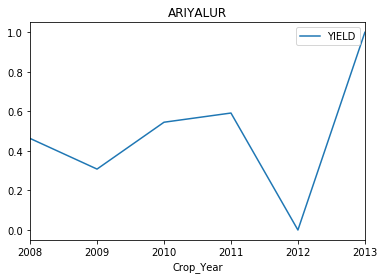

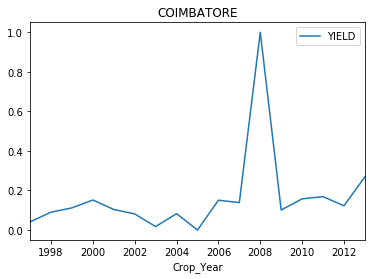

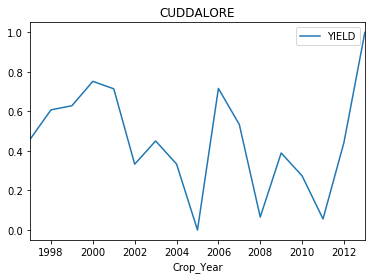

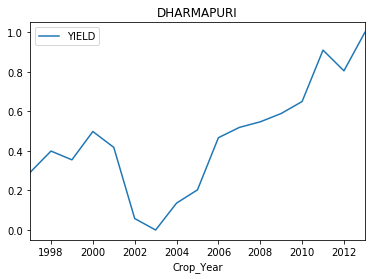

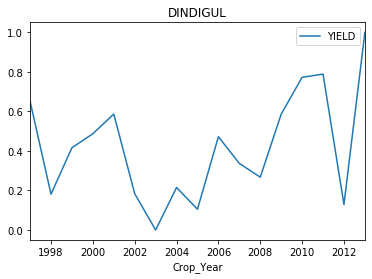

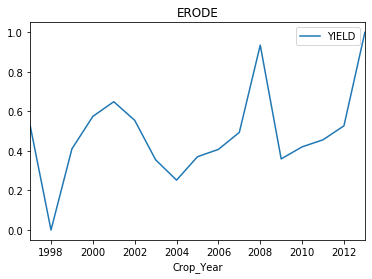

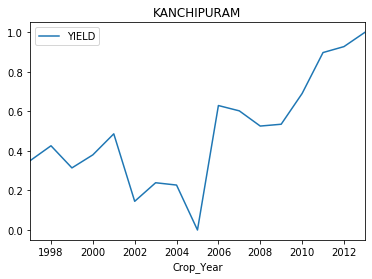

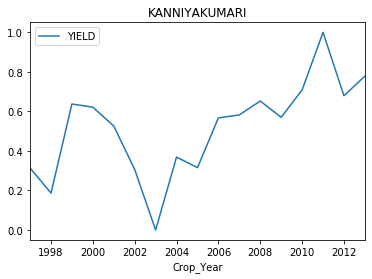

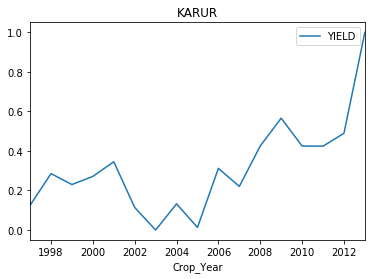

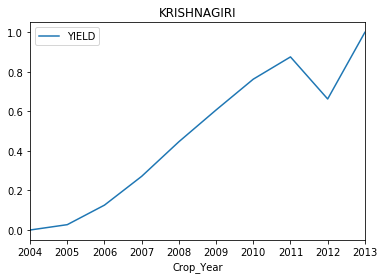

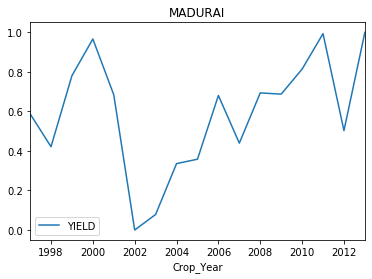

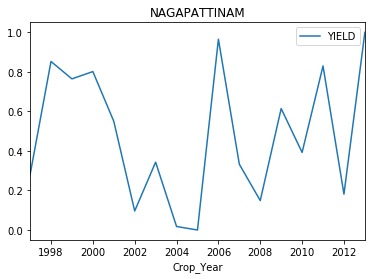

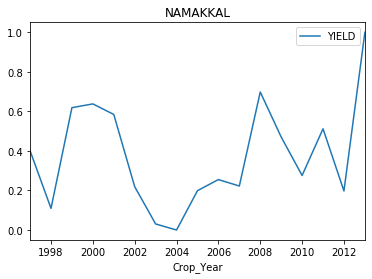

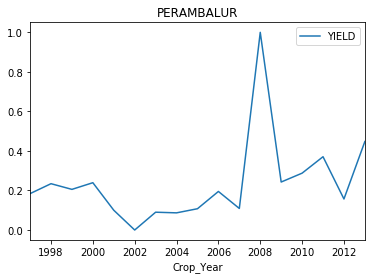

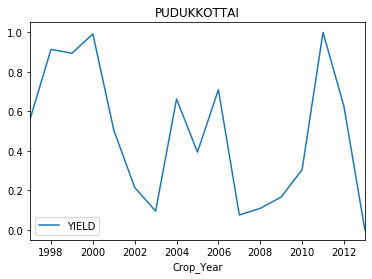

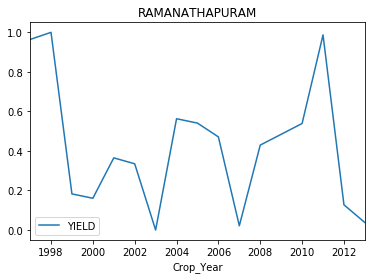

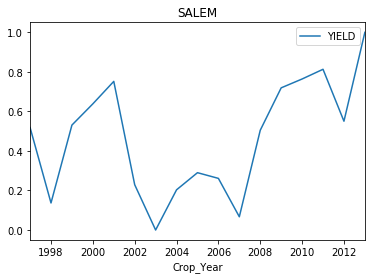

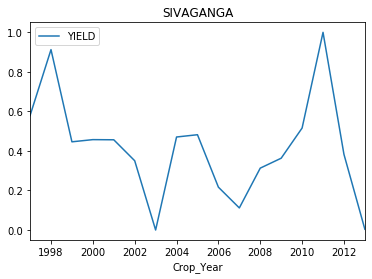

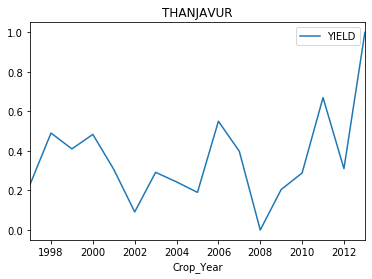

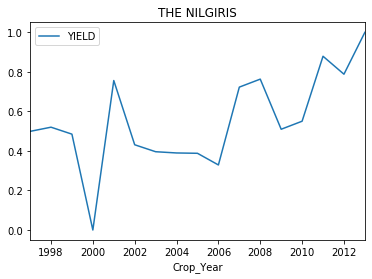

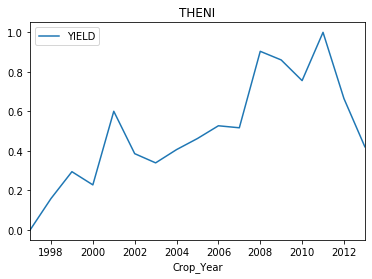

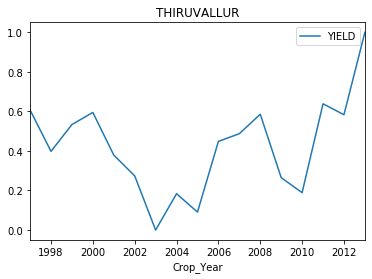

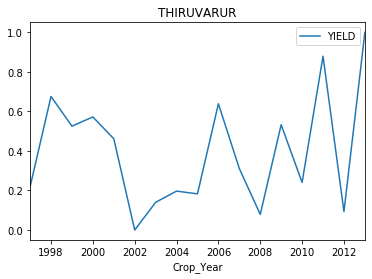

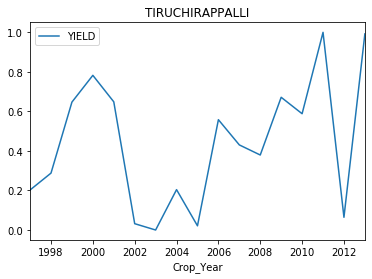

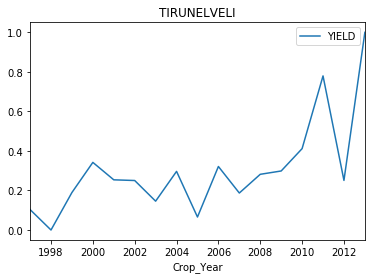

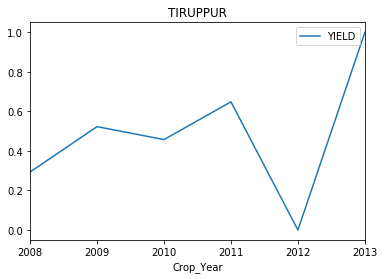

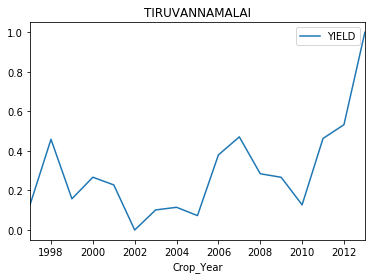

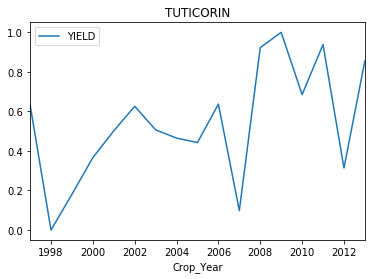

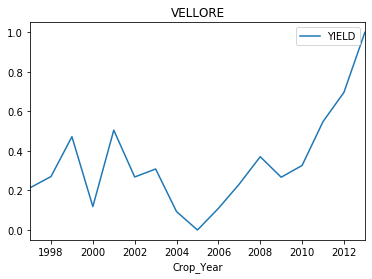

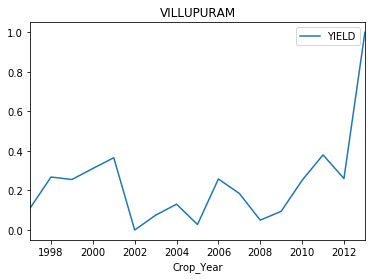

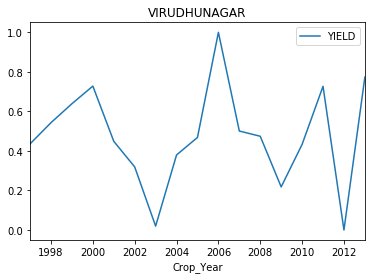

In [45]:
#appending yield into data frame
tn_df['YIELD'] = yldn

#creating list of data frames according to district names
lp=[]
for state in g:
    st= tn_df[tn_df['District_Name'] == state]    
    lp.append(st)
    
#plotting yield/year for each district
for i in range(len(lp)):
    plt = lp[i].plot('Crop_Year', 'YIELD', title=g[i])
    #saving the plots
    plt.figure.savefig(g[i] + '.png')

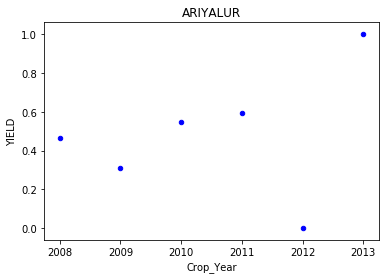

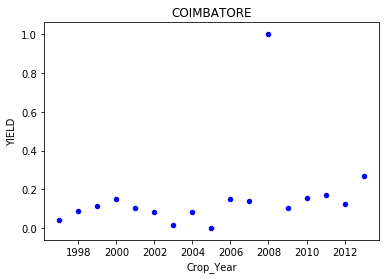

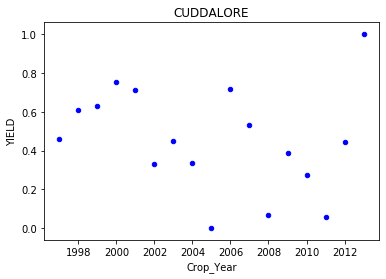

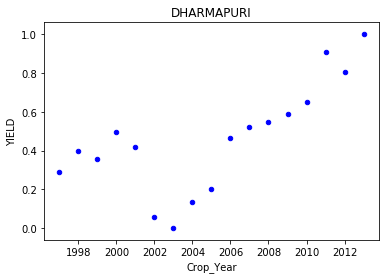

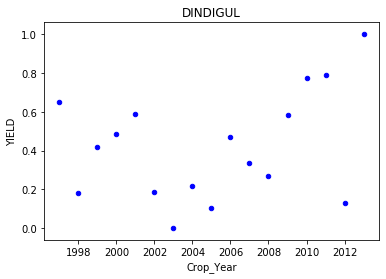

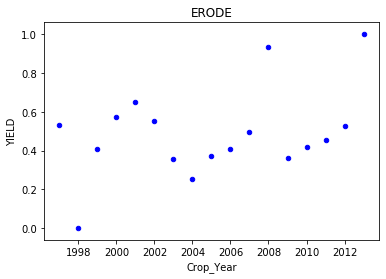

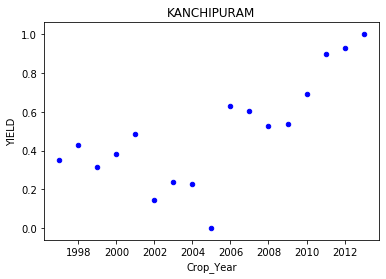

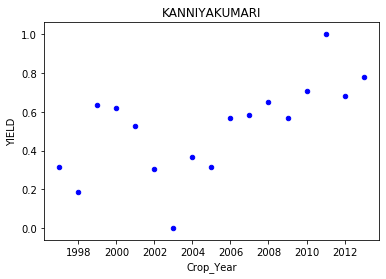

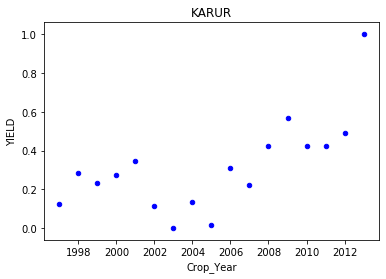

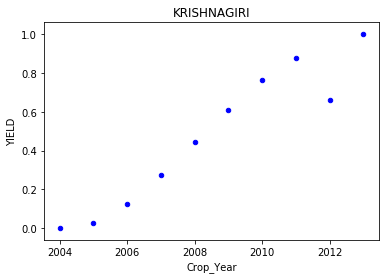

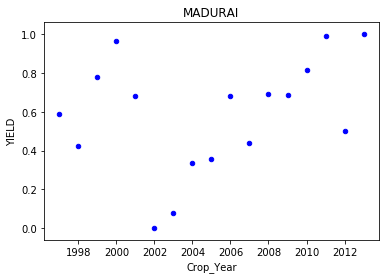

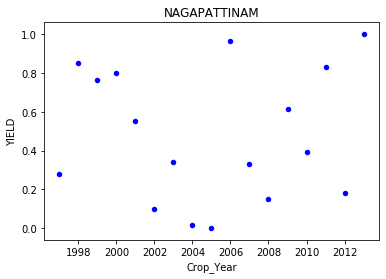

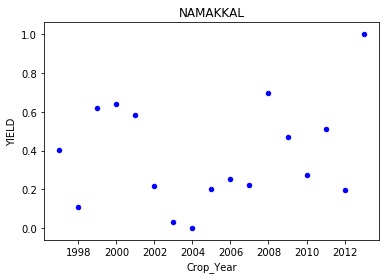

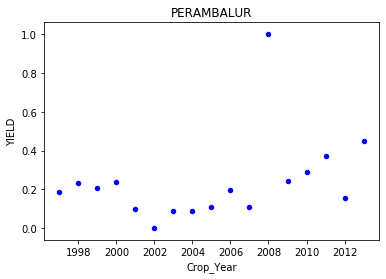

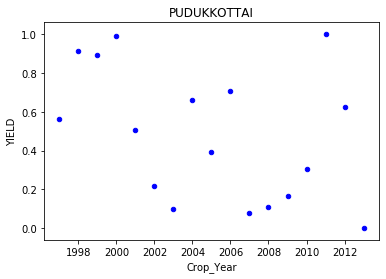

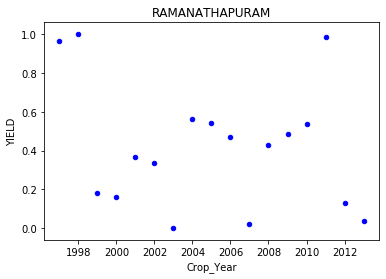

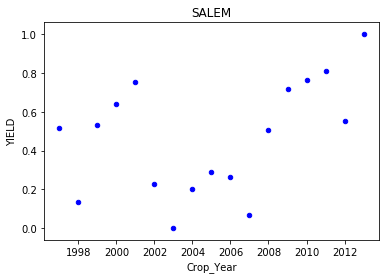

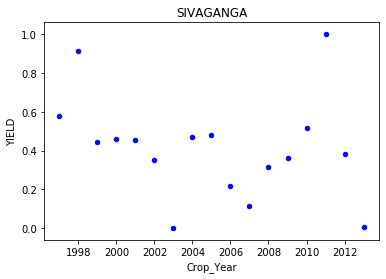

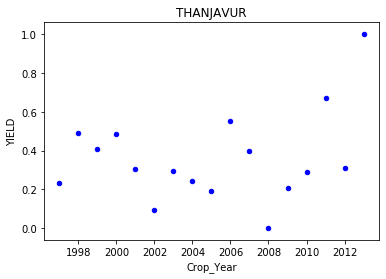

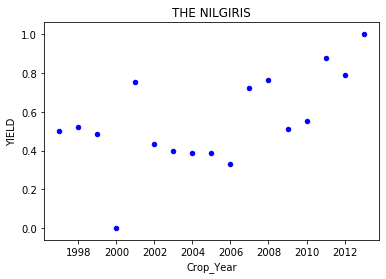

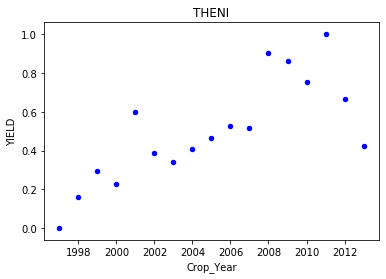

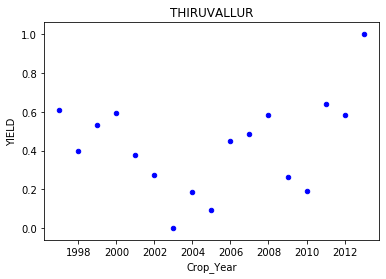

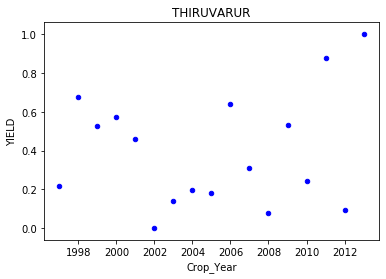

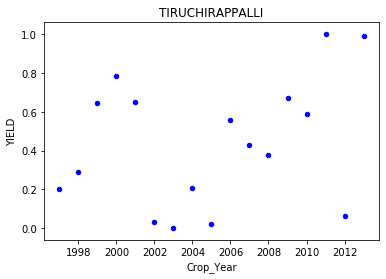

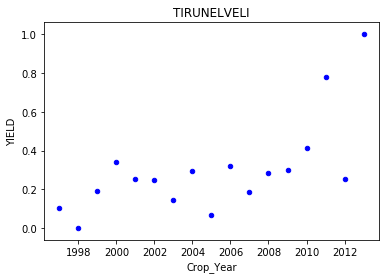

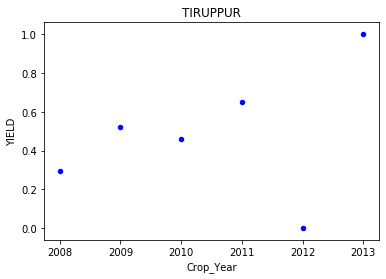

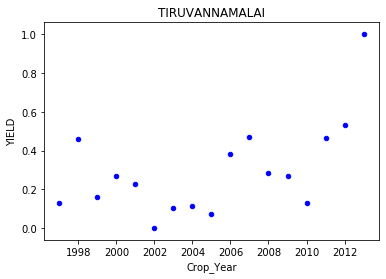

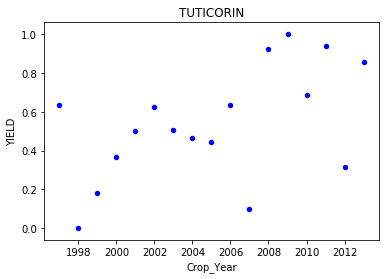

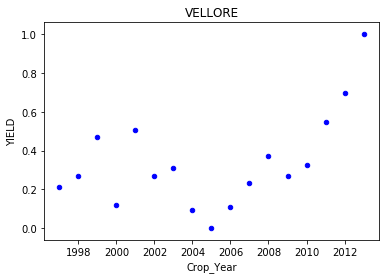

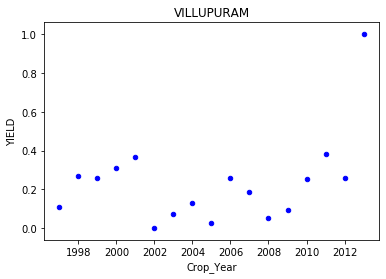

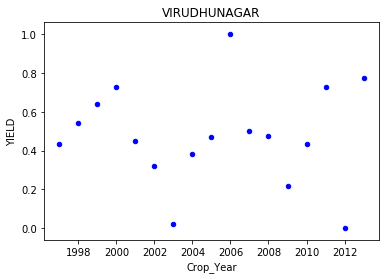

In [48]:
#scatter plot to identify classes

for i in range(len(lp)):
    plt = lp[i].plot.scatter(x='Crop_Year',y='YIELD',color='blue', title=g[i])
    plt.figure.savefig(g[i] + 'scatter.png')